In [62]:
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import DataLoader, Dataset


In [63]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [64]:
device = 'cuda'

In [65]:
X = torch.tensor(x).float().to(device=device)
Y = torch.tensor(y).float().to(device=device)

In [66]:
class data(Dataset):
    def __init__(self, x, y) -> None:
        self.x = torch.tensor(x).float().to(device=device)
        self.y = torch.tensor(y).float().to(device=device)
    def __len__(self):
        return len(self.x)
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [67]:
dataloader = DataLoader(data(x, y), batch_size=2, shuffle=True)

In [68]:
class MyNeuralNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.input_to_hidden1 = nn.Linear(2, 8)
        self.hidden1_activation = nn.ReLU()
        self.hiddden1_to_output = nn.Linear(8, 1)
    def forward(self, x):
        x = self.input_to_hidden1(x)
        x = self.hidden1_activation(x)
        x = self.hiddden1_to_output(x)
        return x
    
net = MyNeuralNet().to(device=device)

In [69]:
def mse_loss(y_hat, y):
    return torch.mean(torch.pow((y_hat - y), 2))

In [70]:
no_of_epochs = 50
optimizer = SGD(net.parameters(), lr=0.001)

In [71]:
loss_history = []
for _ in range(no_of_epochs):
    for x_batch, y_batch in dataloader:
        
        optimizer.zero_grad()
        y_hat = net(x_batch)
        loss = mse_loss(y_hat, y_batch)
        loss.backward()
        optimizer.step()
        loss_history.append(loss)

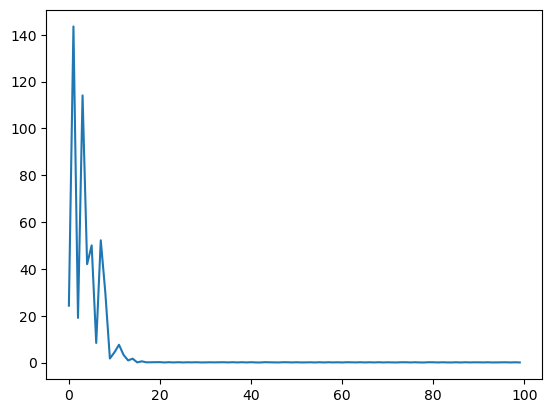

In [72]:
import matplotlib.pyplot as plt

loss_history_cpu = [l.detach().cpu().numpy() for l in loss_history]

plt.plot(loss_history_cpu)

In [73]:
test = [[10, 11]]
test = torch.tensor(test).float().to(device)

In [74]:
net(test)

tensor([[20.5131]], device='cuda:0', grad_fn=<AddmmBackward0>)